# Part 2: Why all these packages?

In the first part of this assignment you learned about `shapely` and `fiona` to represent geospatial vector data and perform geometric operations. From the GeoScripting course you already know the `ogr` package which provides the same functionalities. 

## Python packages `ogr` and `gdal` enable vector and raster data processing

* `ogr` and `gdal` are automatically generated Python bindings (using SWIG) to the C libraries GDAL and OGR 

* So when you use `ogr` and `gdal` classes in Python you are actually executing C code. 

&rarr; Great! C is fast and we can use it from Python.

## So why would we need other Python packages for geo data processing? 

In discussions about Python you will often read statements like this:

![gdal_vs_rasterio](img/gdal_vs_rasterio.png)

[Source: GitHub Issue - rasterio vs python gdal #11](https://github.com/inbo/niche_vlaanderen/issues/11)

### In this assignment we will focus on the following questions: 

1. What does _[Pythonic](https://docs.python-guide.org/writing/style/)_ mean? Why is it suitable for scientists?
2. Why are `ogr` and `gdal` not _Pythonic_ enough? 
3. What are the advantages and disadvantages of using ogr, shapely or your own implementation? 

## Comparing ogr, shapely and pure Python

In this first section of the assignment we will **compare three different ways of representing a polygon in Python.**

1. A very simplified, **pure Python implementation** written by yourself.
2. The **`Geometry` class provided by `ogr` package**.
3. The **`Polygon` class provided by the `shapely` package.**

#### The three methods should be compared in regard to:
* Execution time
* Programming time (how long did it take to write the code)
* Readability
* Flexibility (how easily can you adapt it to your needs)

### 1. Create your own `Polygon` class in Python

__E 1.1:__ Write a class called `MyPolygon` which takes a list of tuples containing the coordinates of the polygon for initialization. The coordinates should be stored as an attribute of the instance called "coordinates". Use the `test_coordinates` below to test your class. 

In [1]:
test_coordinates = [(1,1),(1,2),(2,2),(2,1),(1,1)]

In [2]:
class MyPolygon:
        
    def __init__(self, coordinates):
        self.coordinates = coordinates
        
    def envelope(self):
        pass

In [3]:
my_poly = MyPolygon(test_coordinates)

Test whether the instance of class `Polygon` returns the right value. If there is not error message, everything's fine. 

In [4]:
assert my_poly.coordinates == test_coordinates

__E 1.2:__ Add a method `envelope` which calculates the bounding box of the polygon. The method should return the bounding box as a list containing the coordinates of the bounding box `[min_x, min_y, max_x, max_y]`.

__Note:__ A bounding box is often reffered to as the envelope of a geometry.

In [5]:
class MyPolygon():
        
    def __init__(self, coordinates):
        self.coordinates = coordinates
        
    def envelope(self):
        """
        Calculates the bounding box (or envelope) of the polygon.
        """
        
        xcoords = [x for x, y in self.coordinates]
        ycoords = [y for x, y in self.coordinates]
        
        minx = min(xcoords)
        maxx = max(xcoords)
        miny = min(ycoords)
        maxy = max(ycoords)
        
        return [minx, miny, maxx, maxy]

In [6]:
my_poly = MyPolygon(test_coordinates)

In [7]:
my_poly_env = my_poly.envelope()
print("minX: {0}, minY: {1}, maxX: {2}, maxY: {3}".format(*my_poly_env))

minX: 1, minY: 1, maxX: 2, maxY: 2


Alternative using numpy:

In [8]:
import numpy as np

In [9]:
class MyPolygon():
    
    def __init__(self, coordinates):
        self.coordinates = np.array(coordinates)
        
    def envelope(self):
        """
        Calculates the bounding box (or envelope) of the polygon.
        """
        xcoords = self.coordinates[:,0]
        ycoords = self.coordinates[:,1]

        minx = xcoords.min()
        maxx = xcoords.max()
        miny = ycoords.min()
        maxy = ycoords.max()
        
        return [minx, miny, maxx, maxy]

### 2. Calculate bounding box using  `ogr.Geometry`
So you've created a very simple Polygon class in Python with just a few lines of code. Now let's compare your implementation to the one provided by the `ogr` package. 

__E 2.1:__ Use the `ogr` package to create a polygon object using the same `test_coordinates` as above.

In [10]:
import ogr

In [11]:
# Create ring
ring = ogr.Geometry(ogr.wkbLinearRing)
for c in test_coordinates:
    ring.AddPoint(c[0], c[1])
# Create polygon
ogr_poly = ogr.Geometry(ogr.wkbPolygon)
ogr_poly.AddGeometry(ring)

0

__E 2.2:__ Calculate the envelope of the polygon.

In [12]:
ogr_poly_env = ogr_poly.GetEnvelope()
print("minX: {0}, minY: {2}, maxX: {1}, maxY: {3}".format(*ogr_poly_env))

minX: 1.0, minY: 1.0, maxX: 2.0, maxY: 2.0


Are the results from your class and the ogr class the same? If not check your code.

__Note:__ Remember that the order of the coordinates of the bounding box returned by `ogr` method is  `[min_x, max_x, min_y, max_y]`. 

### 3. Calculate the bounding box using `shapely` 

Those were a lot of lines just for creating a simple polygon. For this reason, `shapely` was developed. Creating a geometry using shapely works the same way as for our Python implementation. 

__E 3.1:__ Use `shapely` package to create a polygon object using the same `test_coordinates` as above.

In [13]:
from shapely.geometry import Polygon

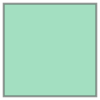

In [14]:
shapely_poly = Polygon(test_coordinates)
shapely_poly

__E 3.2:__ Calculate the bounding box of the shapely polygon using the method `bounds()`.

In [15]:
print("minX: {}, minY: {}, maxX:{}, maxY: {}".format(*shapely_poly.bounds))

minX: 1.0, minY: 1.0, maxX:2.0, maxY: 2.0


### 4. Comparison of execution time
Compare the exectution times of both methods using the magic command `%%timeit`. This function will execute the cell multiple times to get a good estimate of the execution time. 

#### Exection time of bounding box calculation
__E 4.1:__ Compare the exection times of the calculation of the bounding box of all three methods. 

In [16]:
%%timeit
my_poly.envelope()

1.88 µs ± 52.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
%%timeit
ogr_poly.GetEnvelope()

591 ns ± 22 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%%timeit
shapely_poly.bounds

35.1 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


__Question:__ What do you observe when you compre the execution times of all three methods? Can you explain the difference in execution times?

__Answer:__ 

#### Comparison bounding box creation and object creation

When choosing the most efficient way to calculate something, we also need to consider the _overhead_ of the calculation. The _overhead_ contains all the processing steps that need to be taken as a preparation before the execution of the desired calculation. Depending on the implementation, this can change your decision.  

__E 4.2:__ Measure the execution times of all three implementations including the object createion.

In [20]:
%%timeit
my_poly = MyPolygon(test_coordinates)
my_poly_env = my_poly.envelope()

14.3 µs ± 859 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%%timeit
# Create ring
ring = ogr.Geometry(ogr.wkbLinearRing)
for c in test_coordinates:
    ring.AddPoint(c[0], c[1])
# Create polygon
poly_ogr = ogr.Geometry(ogr.wkbPolygon)
poly_ogr.AddGeometry(ring)
poly_ogr_env = poly_ogr.GetEnvelope()

14.2 µs ± 29.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%%timeit
shapely_poly = Polygon(shell=test_coordinates)
shapely_poly.bounds

45.2 µs ± 4.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


__Question:__ What do you observe when you compre the execution times and the object creation of all three polygon implementations? Can you explain the difference in execution times?

__Your Answer:__

### 5. Questions for Discussion

__Q1:__ Based on your results of the exercises, evaluate the three methods in the table below. (Double click the cell, to edit it)


|            | Execution time <br> (fast - slow)| Programming time <br> (fast - slow)| Readability <br> (high - low) | Flexibility  <br> (high - low)       |
|------------|----------------|------------------|-------------|-------------------|
| __DIY Python__ | fast           | slow             | high        | high              |
| __OGR__        | very fast      | medium             | low         | mostly sufficient |
| __Shapely__    | quite slow     | fast             | high        | mostly sufficient |

__Q2:__ Answer the questions from the beginning of the notebook. 

1. First, try to answer them on your own. 
2. Then, discuss them in groups or pairs with your peers. 
3. We will discuss the results in the course at the end of today's session. 

Please provide your answers below.

1. What does _[Pythonic](https://docs.python-guide.org/writing/style/)_ mean? Why is it suitable for scientists?
2. Why are `ogr` and `gdal` not _Pythonic_ enough? 
3. What are the advantages and disadvantages of using ogr, shapely or your own implementation for vector data processing? 

__Your answers:__

### Summary:

* There are different ways to perform geometric manipulations in Python. 
* However, when we do complex spatial analysis, we will need to apply these operations to whole layers and not just single features. 
* To make such analyses possible the `pandas` and `geopandas` packages are used. 

In the last part of the assignment, we will look at the `pandas` an `geopandas` packages to perform more complex spatial analyses. 

&rarr; Continue with [Part 3: Vector Data Analysis using GeoPandas](./02-geopandas.ipynb)

## References

If you would like to take a deeper look at object oriented programming in Python take a look at the following resources: 

* [Object Oriented Programming in Python](https://github.com/TheDigitalCatOnline/thedigitalcatonline.github.com/tree/master/notebooks)
* [Python Tutorial](https://docs.python.org/3/tutorial/classes.html)
* [Abstract Classes](https://docs.python.org/3/library/abc.html#module-abc)
* [Computational Geometry in Python: From Theory to Application](https://www.toptal.com/python/computational-geometry-in-python-from-theory-to-implementation
)

    
